In [109]:
import pandas as pd
from sklearn.decomposition import PCA

from sklearn import preprocessing
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sns
import plotly.express as px

from datetime import datetime


In [111]:
with open('SampleInput.txt') as f:
    data = f.readlines()

In [112]:
columns = ['Year','Day','Hour','Minutes','Seconds','Milliseconds','unknown']
rows = []
for i in data:
    if 'DTG' in i:
        columns.append(i.replace('\n',''))
    elif len(i.split(" "))>5:
        new_list = [j for j in i.split(" ") if j not in ['',0,'\n']]

        date_string = str(new_list[1]) + " " +  str(new_list[0]) + " " +  str(new_list[2]) + " " +  str(new_list[3]) + " " +  str(new_list[4]) + " " +  str(new_list[5])
        date_object = datetime.strptime(date_string, "%j %Y %H %M %S %f")
        new_list = new_list[6:]
        date_str = date_object.strftime("%Y-%m-%d %H %M %S %f")
        new_list.insert(0, date_str)
        
        
        if new_list[14] == 'ON':
            new_list[14] = 1
        else:
            new_list[14] = 0
            
        if new_list[15] == 'ON':
            new_list[15] = 1
        else:
            new_list[15] = 0
        
        if new_list[16] == 'ON':
            new_list[16] = 1
        else:
            new_list[16] = 0
            
        if new_list[17] == 'SYNC':
            new_list[17] = 1
        else:
            new_list[17] = 0
            
        if new_list[18] == 'NOT_USBL':
            new_list[18] = 0
        else:
            new_list[18] = 1
            
        if new_list[19] == 'ENA':
            new_list[19] = 1
        else:
            new_list[19] = 0
        
        if new_list[20] == 'LOW':
            new_list[20] = 0
        else:
            new_list[20] = 1
            
        if new_list[21] == 'ON':
            new_list[21] = 1
        else:
            new_list[21] = 0
            
        if new_list[22] == 'SYNC':
            new_list[22] = 1
        else:
            new_list[22] = 0
            
            
        rows.append(new_list)


In [113]:
columns = ['Date']+columns[6:-9]
print(len(columns))

14


In [114]:
import pandas as pd
df = pd.DataFrame()

In [115]:
for j in range(len(columns)):
    col_data = []
    for i in rows:        
        if j >= 1:
            col_data.append(int(float(i[j]) * 10000))
        else: 
            col_data.append(i[j])
    df[columns[j]] = col_data
    
display(df)

,Date,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),DTG-1_ELECTRONICS_TH (Analog),DTG-2_TH_TEMP (Analog),DTG-2_ELECTRONICS_TH (Analog)
0,2018-04-15 17 39 55 043000,220000,-469,-385,54,112,1293,-687,69,76,380000,520000,390000,520000
1,2018-04-15 17 39 55 555000,230000,-469,-385,54,112,1293,-687,69,76,380000,520000,390000,520000
2,2018-04-15 17 39 57 091000,260000,-469,-385,54,112,1293,-687,69,76,380000,520000,390000,520000
3,2018-04-15 17 39 58 627000,290000,-469,-385,54,112,1293,-687,69,76,380000,520000,390000,520000
4,2018-04-15 17 40 02 211000,40000,-469,-385,54,112,1293,-687,69,76,380000,520000,390000,520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186293,2018-05-18 12 39 42 526000,220000,-469,-385,57,113,-981,-687,64,79,370000,510000,370000,510000
186294,2018-05-18 12 39 43 038000,230000,-469,-385,58,113,-981,-687,65,80,370000,510000,370000,510000
186295,2018-05-18 12 39 44 574000,260000,-469,-385,58,113,-981,-687,65,80,370000,510000,370000,510000
186296,2018-05-18 12 39 46 110000,290000,-469,-385,58,113,-981,-687,65,80,370000,510000,370000,510000


In [116]:
# copy the data
df_max_scaled = df.copy()

outlier_percentage = 90
outlier_percentage_in_decimal = outlier_percentage / 100

# Convert first column from python string to pandas date object
for column in df_max_scaled.columns[:1]:
    df_max_scaled[column] = pd.to_datetime(df_max_scaled[column], format="%Y-%m-%d %H %M %S %f")

  
# apply normalization techniques
for column in df_max_scaled.columns[1:]:
    df_max_scaled[column] = df_max_scaled[column].fillna(0)
    if df_max_scaled[column].max() != 1 and df_max_scaled[column].min() != 0:
        column_values = np.array(df_max_scaled[column].values.tolist())
        column_values[(column_values > np.amax(column_values) * outlier_percentage_in_decimal) | (column_values < np.amin(column_values) * outlier_percentage_in_decimal)] = np.mean(column_values)
        df_max_scaled[column] = column_values

        df_max_scaled[column] = (df_max_scaled[column] - df_max_scaled[column].min()) / (df_max_scaled[column].max() - df_max_scaled[column].min())    
        
        

display(df_max_scaled)


,Date,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),DTG-1_ELECTRONICS_TH (Analog),DTG-2_TH_TEMP (Analog),DTG-2_ELECTRONICS_TH (Analog)
0,2018-04-15 17:39:55.043,0.818182,0.34375,0.228571,0.495652,0.594595,0.166648,0.242424,0.594595,0.508929,1.0,1.0,0.487179,1.0
1,2018-04-15 17:39:55.555,0.863636,0.34375,0.228571,0.495652,0.594595,0.166648,0.242424,0.594595,0.508929,1.0,1.0,0.487179,1.0
2,2018-04-15 17:39:57.091,1.000000,0.34375,0.228571,0.495652,0.594595,0.166648,0.242424,0.594595,0.508929,1.0,1.0,0.487179,1.0
3,2018-04-15 17:39:58.627,0.698818,0.34375,0.228571,0.495652,0.594595,0.166648,0.242424,0.594595,0.508929,1.0,1.0,0.487179,1.0
4,2018-04-15 17:40:02.211,0.000000,0.34375,0.228571,0.495652,0.594595,0.166648,0.242424,0.594595,0.508929,1.0,1.0,0.487179,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186293,2018-05-18 12:39:42.526,0.818182,0.34375,0.228571,0.521739,0.603604,0.125000,0.242424,0.549550,0.535714,1.0,1.0,0.461538,1.0
186294,2018-05-18 12:39:43.038,0.863636,0.34375,0.228571,0.530435,0.603604,0.125000,0.242424,0.558559,0.544643,1.0,1.0,0.461538,1.0
186295,2018-05-18 12:39:44.574,1.000000,0.34375,0.228571,0.530435,0.603604,0.125000,0.242424,0.558559,0.544643,1.0,1.0,0.461538,1.0
186296,2018-05-18 12:39:46.110,0.698818,0.34375,0.228571,0.530435,0.603604,0.125000,0.242424,0.558559,0.544643,1.0,1.0,0.461538,1.0


In [117]:


df_max_scaled.set_index('Date', inplace=True)

# Resample 
df_sample = df_max_scaled.resample('H').mean()
display(df_sample)


# Check if data is correct
from adtk.data import validate_series
validate_series(df_sample)

,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),DTG-1_ELECTRONICS_TH (Analog),DTG-2_TH_TEMP (Analog),DTG-2_ELECTRONICS_TH (Analog)
Date,,,,,,,,,,,,,
2018-04-15 17:00:00,0.642064,0.344293,0.228571,0.492590,0.582609,0.148359,0.240316,0.596005,0.508618,1.0,1.0,0.487179,1.0
2018-04-15 18:00:00,0.649974,0.343750,0.228571,0.516647,0.582501,0.125000,0.242424,0.550686,0.533060,1.0,1.0,0.487179,1.0
2018-04-15 19:00:00,0.644170,0.343750,0.228571,0.523542,0.570616,0.132111,0.242424,0.566359,0.539743,1.0,1.0,0.487179,1.0
2018-04-15 20:00:00,0.644170,0.342634,0.228571,0.508540,0.591779,0.132437,0.240260,0.565557,0.523677,1.0,1.0,0.487179,1.0
2018-04-15 21:00:00,0.644170,0.343750,0.228571,0.515373,0.582046,0.126487,0.242424,0.553813,0.531489,1.0,1.0,0.487179,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-18 08:00:00,0.644170,0.343750,0.228571,0.515301,0.588011,0.131407,0.242424,0.575710,0.532538,1.0,1.0,0.473373,1.0
2018-05-18 09:00:00,0.645357,0.343389,0.227911,0.519754,0.574468,0.127648,0.242424,0.554835,0.536359,1.0,1.0,0.471098,1.0
2018-05-18 10:00:00,0.635880,0.343750,0.228571,0.509061,0.574387,0.129671,0.242424,0.565463,0.524032,1.0,1.0,0.469207,1.0


,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),DTG-1_ELECTRONICS_TH (Analog),DTG-2_TH_TEMP (Analog),DTG-2_ELECTRONICS_TH (Analog)
Date,,,,,,,,,,,,,
2018-04-15 17:00:00,0.642064,0.344293,0.228571,0.492590,0.582609,0.148359,0.240316,0.596005,0.508618,1.0,1.0,0.487179,1.0
2018-04-15 18:00:00,0.649974,0.343750,0.228571,0.516647,0.582501,0.125000,0.242424,0.550686,0.533060,1.0,1.0,0.487179,1.0
2018-04-15 19:00:00,0.644170,0.343750,0.228571,0.523542,0.570616,0.132111,0.242424,0.566359,0.539743,1.0,1.0,0.487179,1.0
2018-04-15 20:00:00,0.644170,0.342634,0.228571,0.508540,0.591779,0.132437,0.240260,0.565557,0.523677,1.0,1.0,0.487179,1.0
2018-04-15 21:00:00,0.644170,0.343750,0.228571,0.515373,0.582046,0.126487,0.242424,0.553813,0.531489,1.0,1.0,0.487179,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-18 08:00:00,0.644170,0.343750,0.228571,0.515301,0.588011,0.131407,0.242424,0.575710,0.532538,1.0,1.0,0.473373,1.0
2018-05-18 09:00:00,0.645357,0.343389,0.227911,0.519754,0.574468,0.127648,0.242424,0.554835,0.536359,1.0,1.0,0.471098,1.0
2018-05-18 10:00:00,0.635880,0.343750,0.228571,0.509061,0.574387,0.129671,0.242424,0.565463,0.524032,1.0,1.0,0.469207,1.0


In [153]:
pca = PCA()
print(len(df_max_scaled.columns))
pca.fit_transform(df_max_scaled)
pca.explained_variance_ratio_

9


array([0.73512794, 0.09920472, 0.06749584, 0.04507371, 0.01907587,
       0.01280023, 0.01022288, 0.00651606, 0.00448274])

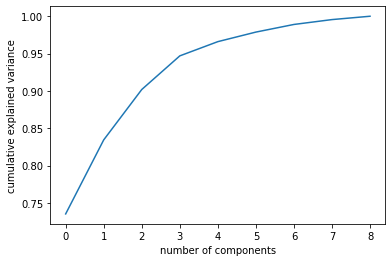

In [154]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [163]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(df_max_scaled) # this will fit and reduce dimensions
print(pca.n_components_)
print(pca.explained_variance_ratio_)

8
[0.73512794 0.09920472 0.06749584 0.04507371 0.01907587 0.01280023
 0.01022288 0.00651606]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


unknown vs DTG-2_ELECTRONICS_TH (Analog)


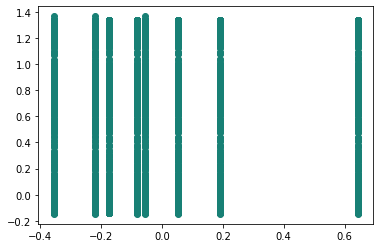

<Figure size 648x504 with 0 Axes>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


DTG-2_ELECTRONICS_TH (Analog) vs DTG-2_PCH_FINE_RATE  (Analog)


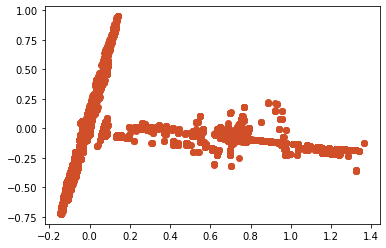

<Figure size 648x504 with 0 Axes>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


DTG-2_PCH_FINE_RATE  (Analog) vs DTG-1_ROL_FINE_RATE  (Analog)


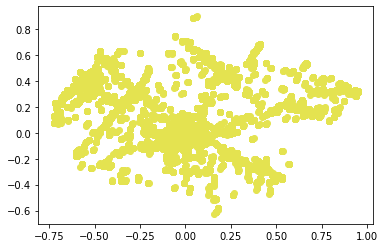

<Figure size 648x504 with 0 Axes>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


DTG-1_ROL_FINE_RATE  (Analog) vs DTG-2_YAW_ANALOG_RAT (Analog)


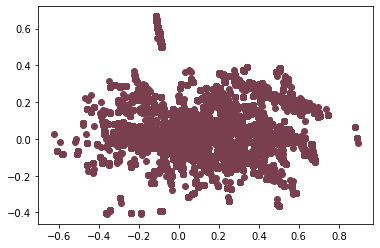

<Figure size 648x504 with 0 Axes>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


DTG-2_YAW_ANALOG_RAT (Analog) vs DTG-2_YAW_FINE_RATE  (Analog)


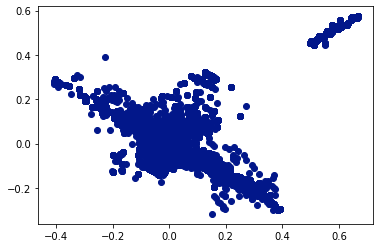

<Figure size 648x504 with 0 Axes>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


DTG-2_YAW_FINE_RATE  (Analog) vs DTG-1_ELECTRONICS_TH (Analog)


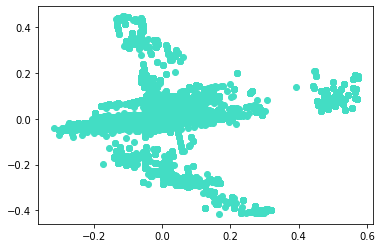

<Figure size 648x504 with 0 Axes>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


DTG-1_ELECTRONICS_TH (Analog) vs DTG-1_PCH_FINE_RATE  (Analog)


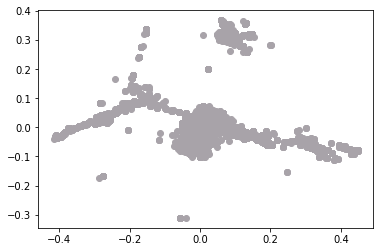

<Figure size 648x504 with 0 Axes>

In [161]:
for i in range(pca.n_components_ -1):
    plot = plt.scatter(X_pca[:,i], X_pca[:,(i+1)],c=np.random.rand(3,))
    print(df_max_scaled.columns[i]+' vs '+ df_max_scaled.columns[i+1])
    plt.figure(figsize=(9, 7))
    plt.show()

In [121]:
pd.DataFrame(pca.components_, columns = df_max_scaled.columns)

,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),DTG-1_ELECTRONICS_TH (Analog),DTG-2_TH_TEMP (Analog),DTG-2_ELECTRONICS_TH (Analog)
0,-1.000000,0.000018,-0.000058,-0.000043,-0.000160,0.000006,-0.000044,0.000048,-0.000028,0.000056,0.000055,0.000055,0.000063
1,-0.000108,0.066121,0.017662,0.053660,-0.027971,0.010405,0.019414,-0.004125,0.080059,-0.438433,-0.446554,-0.201214,-0.743385
2,0.000039,0.066383,-0.122698,0.524875,-0.480325,-0.085142,0.130794,-0.225229,0.624179,0.050158,0.052372,0.019756,0.063254
3,0.000121,-0.078244,-0.280382,-0.289448,-0.626255,-0.235576,-0.169027,-0.412900,-0.424645,0.017855,-0.019800,0.000359,-0.060837
4,0.000024,0.240025,0.421673,-0.105207,-0.349512,0.608900,0.438493,-0.101366,-0.170694,-0.127334,0.042231,-0.035192,0.098334
5,-0.000133,0.063840,0.214058,0.055784,0.451456,-0.135219,0.106048,-0.843364,-0.008834,-0.025441,0.002245,-0.032277,0.024802
6,0.000024,0.371457,0.022151,-0.143523,0.011821,-0.044433,-0.008001,0.015122,0.071148,0.338385,0.650433,-0.089583,-0.536534
7,-0.000013,-0.154285,0.163895,0.750507,-0.022386,0.082928,-0.188256,0.030405,-0.541182,0.080387,0.144804,-0.013369,-0.147795
8,-0.000025,-0.866392,0.201451,-0.163025,-0.056827,0.139825,0.097629,-0.072352,0.197051,0.058297,0.230980,-0.073221,-0.209090


In [122]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df_max_scaled.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
df_max_scaled = df_max_scaled[most_important_names]
display(df_max_scaled)

,unknown,DTG-2_ELECTRONICS_TH (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-1_ELECTRONICS_TH (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_PCH_ANALOG_RAT (Analog)
Date,,,,,,,,,
2018-04-15 17:39:55.043,0.818182,1.0,0.508929,0.594595,0.166648,0.594595,1.0,0.495652,0.34375
2018-04-15 17:39:55.555,0.863636,1.0,0.508929,0.594595,0.166648,0.594595,1.0,0.495652,0.34375
2018-04-15 17:39:57.091,1.000000,1.0,0.508929,0.594595,0.166648,0.594595,1.0,0.495652,0.34375
2018-04-15 17:39:58.627,0.698818,1.0,0.508929,0.594595,0.166648,0.594595,1.0,0.495652,0.34375
2018-04-15 17:40:02.211,0.000000,1.0,0.508929,0.594595,0.166648,0.594595,1.0,0.495652,0.34375
...,...,...,...,...,...,...,...,...,...
2018-05-18 12:39:42.526,0.818182,1.0,0.535714,0.603604,0.125000,0.549550,1.0,0.521739,0.34375
2018-05-18 12:39:43.038,0.863636,1.0,0.544643,0.603604,0.125000,0.558559,1.0,0.530435,0.34375
2018-05-18 12:39:44.574,1.000000,1.0,0.544643,0.603604,0.125000,0.558559,1.0,0.530435,0.34375


/tmp/ipykernel_40496/798796701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_510[column] = pd.to_datetime(df_510[column], format="%Y-%m-%d %H %M %S %f")
/tmp/ipykernel_40496/798796701.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_510[column] = (df_510[column] -


,unknown,DTG-2_ELECTRONICS_TH (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-1_ELECTRONICS_TH (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_PCH_ANALOG_RAT (Analog)
Date,,,,,,,,,
2018-05-10 10:00:00,0.619668,1.150731,-0.649017,-0.205326,0.220620,0.212165,1.159113,0.486783,0.413569
2018-05-10 10:01:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-05-10 10:02:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-05-10 10:03:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-05-10 10:04:00,-0.014344,1.150731,-0.953066,-0.205326,0.220620,-0.101820,1.159113,0.468978,0.413569
...,...,...,...,...,...,...,...,...,...
2018-05-10 11:54:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-05-10 11:55:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-05-10 11:56:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


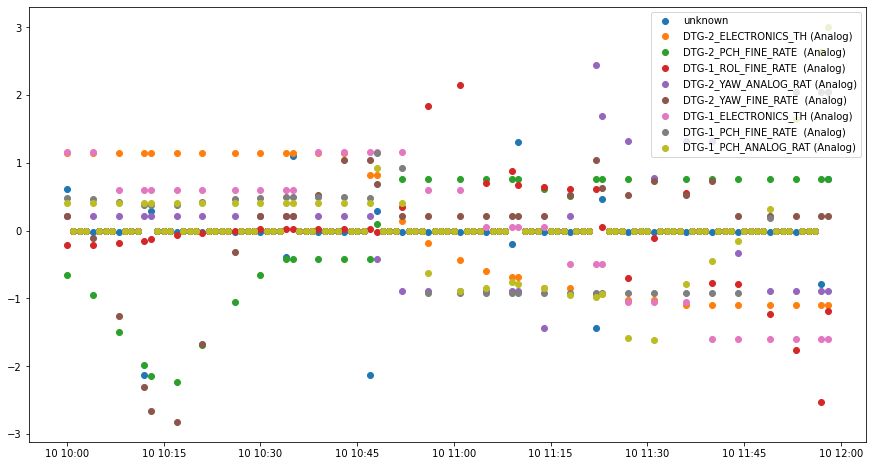

In [127]:
plt.figure(figsize=(15, 8))
df_510 = df[df['Date'].str.contains('2018-05-10 10') | df['Date'].str.contains('2018-05-10 11')]
# Convert first column from python string to pandas date object
for column in df_510.columns[:1]:
    df_510[column] = pd.to_datetime(df_510[column], format="%Y-%m-%d %H %M %S %f")

outlier_percentage_in_decimal= 0.85
  
# apply normalization techniques
for column in df_510.columns[1:]:
    if df_510[column].max() != 1 and df_510[column].min() != 0:
        df_510[column] = (df_510[column] -
                       df_510[column].mean()) / df_510[column].std()  
#         df_510[column] = (df_510[column] - df_510[column].min()) / (df_510[column].max() - df_510[column].min())    

df_510.set_index('Date', inplace=True)
df_510 = df_510[most_important_names]


df_510_r = df_510.resample('T').mean()
for column in df_510_r.columns:
    df_510_r[column] = df_510_r[column].replace(np.nan, 0)
display(df_510_r)
for column in df_510_r.columns:    
    plt.scatter(df_510_r.index, df_510_r[column])

plt.legend(df_510_r.columns)
    
plt.show()